# Sheet 4

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn

## 1 Learning with pytorch

By hand.

In [3]:
import micrograd
x0 = np.array([1.5, 0.5])
L = lambda x: (np.sin(x[0]/x[1]) + x[0]/x[1] - np.exp(x[1])) * (x[0]/x[1] - np.exp(x[1]))


ModuleNotFoundError: No module named 'micrograd'

(a)

In [4]:
# TODO: manual check of intermediate gradients with torch.autograd.grad
x = torch.tensor([1.5, 0.5], requires_grad=True)
L = (np.sin(x[0]/x[1]) + x[0]/x[1] - np.exp(x[1])) * (x[0]/x[1] - np.exp(x[1]))

torch.autograd.grad(L)

NameError: name 'torch' is not defined

(b)

In [2]:
# TODO: Adam steps

In [4]:
# TODO: Plot the loss

(c)

In [6]:
# TODO: Compute gradients

In [5]:
# TODO: Plot gradients and compare to solution for x1 from part (b)

# 2) Amplitude Regression

In [ ]:
# download data to folder ../sheet04_data
# this might take some time (50MB)
# you can also do this manually (download + unpack zip)
import os, sys
import wget
from zipfile import ZipFile
from tqdm import tqdm

DESTINATION = "../sheet04_data"
url = "https://www.thphys.uni-heidelberg.de/~plehn/pics/"
filename = "tutorial-2-data.zip"
url = url + filename

#os.makedirs(DESTINATION, exist_ok=True)
#os.chdir(DESTINATION)
#wget.download(url, filename)
#with ZipFile(filename, "r") as zip_ref:
#    for file in tqdm(iterable=zip_ref.namelist(), total=len(zip_ref.namelist())):
#        zip_ref.extract(member=file)
#os.chdir("..")
#%ls ../sheet04_data

In [21]:
# load data
trn_dat = np.load("../../sheet04_data/trn_dat.npy")
trn_amp = np.load("../../sheet04_data/trn_amp.npy")

val_dat = np.load("../../sheet04_data/val_dat.npy")
val_amp = np.load("../../sheet04_data/val_amp.npy")
tst_dat = np.load("../../sheet04_data/tst_dat.npy")
tst_amp = np.load("../../sheet04_data/tst_amp.npy")

print(f"train data shape: {trn_dat.shape}")
print(f"train amp  shape: {trn_amp.shape}")
print(f"test  data shape: {tst_dat.shape}")
print(f"test  amp  shape: {tst_amp.shape}")
print(f"val   data shape: {val_dat.shape}")
print(f"val   amp  shape: {val_amp.shape}")

train data shape: (30000, 5, 4)
train amp  shape: (30000,)
test  data shape: (30000, 5, 4)
test  amp  shape: (30000,)
val   data shape: (30000, 5, 4)
val   amp  shape: (30000,)


(a)

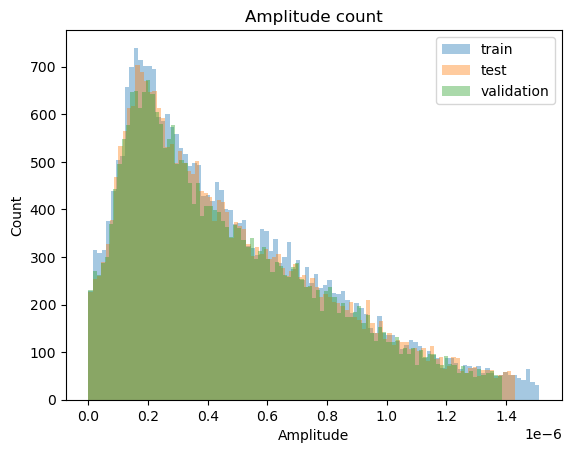

In [104]:
# TODO: Plot amplitudes
plt.hist(trn_amp,range=[0,2 * trn_amp.mean()], bins=100, alpha = 0.4, label='train')
plt.hist(tst_amp,range=[0,2 * tst_amp.mean()], bins=100, alpha = 0.4, label='test')
plt.hist(val_amp,range=[0,2 * val_amp.mean()], bins=100, alpha = 0.4, label='validation')
plt.xlabel('Amplitude')
plt.ylabel('Count')
plt.title('Amplitude count')
plt.legend()

This looks a lot like a poisson distribution @ Mika, was denkst du??

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 29999.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([-1.03461099, -1.01403756, -0.99346412, -0.97289068, -0.95231725,
        -0.93174381, 

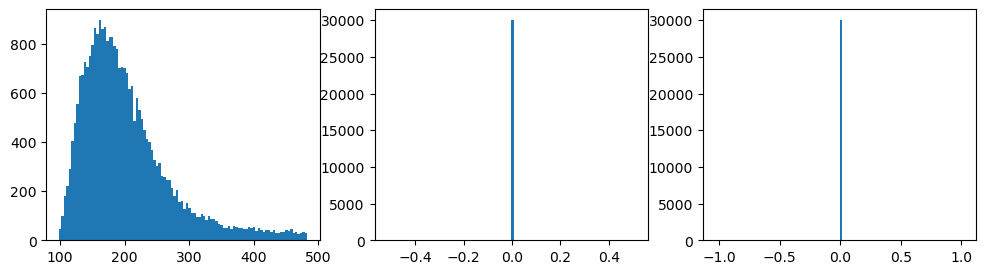

In [127]:
# TODO: Plot incoming momenta
trn_in = trn_dat[:,0,:] + trn_dat[:,1,:]; # sum over incoming particles

fig, axs = plt.subplots(1,3,figsize = (12,3))
axs[0].hist(trn_in[:,0],range=[trn_in[:,0].mean() - trn_in[:,0].std(), trn_in[:,0].mean() + 2 * trn_in[:,0].std()], bins=100)
axs[1].hist(trn_in[:,1],range=[trn_in[:,1].mean() - trn_in[:,1].std(), trn_in[:,1].mean() + trn_in[:,1].std()], bins=100)
axs[2].hist(trn_in[:,2],range=[trn_in[:,2].mean() - trn_in[:,2].std(), trn_in[:,2].mean() + trn_in[:,2].std()], bins=100)


The incoming particles habe no center of mass impulse along y and z axis, but only in x axis in which it is again a right tailed distribution (??)

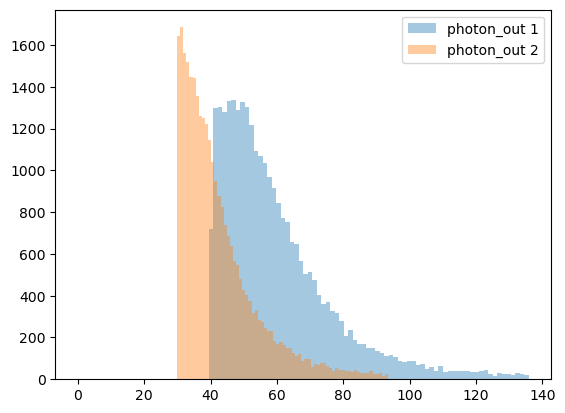

In [118]:
# TODO: Plot photon pTs
pT1 = np.sqrt(trn_dat[:,2,1]**2 + trn_dat[:,2,2]**2)
pT2 = np.sqrt(trn_dat[:,3,1]**2 + trn_dat[:,3,2]**2)

plt.hist(pT1,range=[0,2 * pT1.mean()], bins=100, alpha=0.4, label='photon_out 1')
plt.hist(pT2,range=[0,2 * pT2.mean()], bins=100, alpha=0.4, label='photon_out 2')
plt.legend()

In [16]:
# TODO: Plot MET
# ?? 

(b)

In [119]:
# flatten datasets
nev = trn_dat.shape[0]
trn_datf = np.reshape(trn_dat, (nev, -1))
val_datf = np.reshape(val_dat, (nev, -1))
tst_datf = np.reshape(tst_dat, (nev, -1))

In [176]:
# TODO: Implement preprocessing
def preprocess_x(x_in):
    lnx = np.zeros_like(x_in)
    lnx[x_in > 0] = np.log(x_in[x_in > 0])
    lnx[x_in <= 0] = np.log( - x_in[x_in <= 0])
    return (lnx - np.mean(lnx,axis=0)) / np.std(lnx,axis=0)

def preprocess_A(A_in):
    lnA = np.log(A_in)
    return (lnA - np.mean(lnA)) / np.std(lnA)

def undo_preprocess_A(A_in):
    pass

C:\Users\Claus\AppData\Local\Temp\ipykernel_11680\3086957355.py:5: RuntimeWarning: divide by zero encountered in log
  lnx[x_in <= 0] = np.log( - x_in[x_in <= 0])
C:\Users\Claus\AppData\Local\Temp\ipykernel_11680\3086957355.py:6: RuntimeWarning: invalid value encountered in subtract
  return (lnx - np.mean(lnx,axis=0)) / np.std(lnx,axis=0)


(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 2.150e+02, 1.102e+03, 2.598e+03, 3.774e+03, 4.675e+03,
         4.734e+03, 4.045e+03, 2.811e+03, 1.800e+03, 1.086e+03, 7.080e+02,
         5.910e+02, 4.920e+02, 3.240e+02, 2.430e+02, 2.360e+02, 2.290e+02,
         2.010e+02, 1.350e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.00

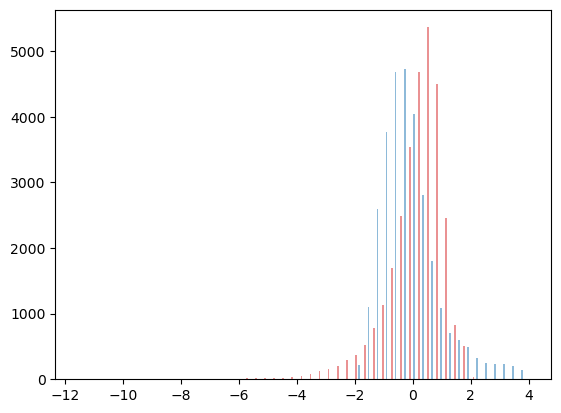

In [175]:
trn = preprocess_x(trn_dat[:,0,:] + trn_dat[:,1,:]) # sum over incoming particles
amp = preprocess_A(trn_amp)


plt.hist(trn,bins=50,alpha=0.5)
#plt.hist(amp,bins=50,alpha=0.5)


C:\Users\Claus\AppData\Local\Temp\ipykernel_11680\4185496930.py:3: RuntimeWarning: divide by zero encountered in log
  lnx = np.log(x_in)
C:\Users\Claus\AppData\Local\Temp\ipykernel_11680\4185496930.py:3: RuntimeWarning: invalid value encountered in log
  lnx = np.log(x_in)
C:\Users\Claus\AppData\Local\Temp\ipykernel_11680\4185496930.py:4: RuntimeWarning: invalid value encountered in subtract
  return (lnx - np.mean(lnx,axis=0)) / np.std(lnx,axis=0)
c:\Users\Claus\.conda\envs\myenv\lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


IndexError: invalid index to scalar variable.

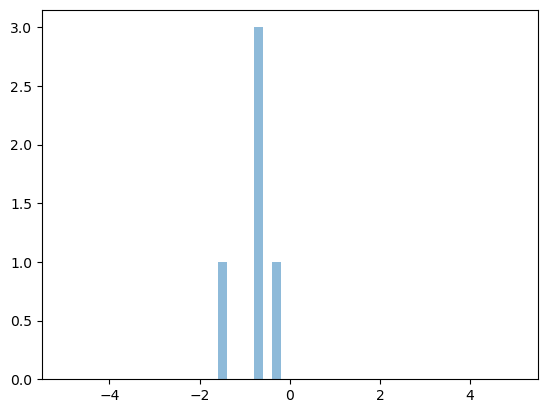

In [152]:

for i in range(3):
    plt.hist(preprocess_x(trn_dat)[0][:,i], range=(-5,5), alpha=.5, bins=50)
plt.hist(preprocess_A(trn_amp)[0][:,0], range=(-5,5), alpha=.5, bins=50)
plt.show()

In [17]:
# TODO: Implement dataset class
class amp_dataset(torch.utils.data.Dataset):
    
    def __init__(self, data, amp):
        pass

    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass

In [40]:
# TODO: create datasets and dataloaders

trn_dataloader = ...
val_dataloader = ...
tst_dataloader = ...

(c)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [42]:
# TODO: Implement network
class amp_net(nn.Module):
    
    def __init__(self, ipt_dim=20, opt_dim=1, hdn_dim=32, n_layers=2):
        super(amp_net, self).__init__()
        
        pass

    def forward(self, x):
        pass

In [ ]:
# TODO: create network
model = ...
print(model)
total_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model has {total_parameters:d} trainable parameters")

In [ ]:
# take first batch from train loader
x, A = next(iter(trn_dataloader))
print(x.shape, A.shape)

In [9]:
# TODO: Train network on first batch for 10000 iterations

In [10]:
# TODO: Plot loss

In [13]:
# TODO: Plot (A_predicted - A_true) / A_true

(d)

In [11]:
# TODO: Train network on the full training dataset

In [12]:
# TODO: Plot loss and amplitude histogram

(e)

In [59]:
# TODO: create dataloaders with reduced dataset

batch_size = 64
trn_dataloader_reduced = ...
val_dataloader_reduced = ...
tst_dataloader_reduced = ...

In [ ]:
# TODO: Train model on reduced dataset

In [ ]:
# TODO: Evaluate model

In [ ]:
# TODO: Implement your regularization approach, train a model and evaluate it